<a href="https://colab.research.google.com/github/tejasvini2805/Fish-Disease-Detection_/blob/main/DL_OWN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define dataset paths
fresh_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/FreshFish'
infected_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/InfectedFish'

# Get all image file paths
fresh_paths = [os.path.join(fresh_path, f) for f in os.listdir(fresh_path)]
infected_paths = [os.path.join(infected_path, f) for f in os.listdir(infected_path)]

# Create labels (0 for fresh, 1 for infected)
fresh_labels = [0] * len(fresh_paths)
infected_labels = [1] * len(infected_paths)

# Combine all paths and labels
all_paths = fresh_paths + infected_paths
all_labels = fresh_labels + infected_labels

# Split into training and testing sets
train_paths, test_paths, train_labels, test_labels = train_test_split(
    all_paths, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

# Function to load and preprocess images
def load_and_preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [250, 250])
    img = img / 255.0  # Normalize pixel values
    return img, label

# Convert paths and labels into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

# Apply preprocessing and batching
train_dataset = train_dataset.map(lambda x, y: load_and_preprocess_image(x, y)).shuffle(1000).batch(32)
test_dataset = test_dataset.map(lambda x, y: load_and_preprocess_image(x, y)).batch(32)

# Check batch shapes
for images, labels in train_dataset.take(1):
    print(f"Train Image batch shape: {images.shape}")
    print(f"Train Label batch shape: {labels.shape}")


Train Image batch shape: (32, 250, 250, 3)
Train Label batch shape: (32,)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.InputLayer(input_shape=(250, 250, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      13,779,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,872,449 (52.92 MB)

 Trainable params: 13,872,449 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=4,
    validation_data=test_dataset
)

Epoch 1/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5904 - loss: 0.9587 - val_accuracy: 0.7769 - val_loss: 0.5165
Epoch 2/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - accuracy: 0.8117 - loss: 0.4642 - val_accuracy: 0.9050 - val_loss: 0.3574
Epoch 3/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.8808 - loss: 0.3338 - val_accuracy: 0.9132 - val_loss: 0.3260
Epoch 4/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9193 - loss: 0.2359 - val_accuracy: 0.8967 - val_loss: 0.2923


In [ ]:

for images, labels in test_dataset.take(1):
    test_loss, test_acc = model.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9062 - loss: 0.2615
Test Loss: 0.261454701423645, Test Accuracy: 0.90625


In [ ]:
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

def create_model():
    model2 = models.Sequential([
        layers.InputLayer(input_shape=(250, 250, 3)),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Initialize model
model2 = create_model()

# Save initial weights
initial_weights = model2.get_weights()


In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
    train_dataset,
    epochs=4,
    validation_data=test_dataset
)

Epoch 1/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.8634 - loss: 0.4185 - val_accuracy: 0.8678 - val_loss: 0.2883
Epoch 2/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9431 - loss: 0.1478 - val_accuracy: 0.9091 - val_loss: 0.3009
Epoch 3/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9785 - loss: 0.0792 - val_accuracy: 0.8967 - val_loss: 0.3706
Epoch 4/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9801 - loss: 0.0565 - val_accuracy: 0.7769 - val_loss: 0.5098


In [ ]:
for images, labels in test_dataset.take(1):
    test_loss, test_acc = model2.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8125 - loss: 0.3976
Test Loss: 0.39761877059936523, Test Accuracy: 0.8125


In [ ]:
from tensorflow.keras import layers, models, optimizers

def build_neural_net():
    cnn_model = models.Sequential([
        layers.InputLayer(input_shape=(250, 250, 3)),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),

        # Fully connected layers with dropout
        layers.Dense(256, activation='relu'),  # Increased number of neurons
        layers.Dropout(0.5),  # Dropout to reduce overfitting

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    return cnn_model


In [ ]:
# Initialize the model
cnn_model3= build_neural_net()

# Compile with Adam optimizer
cnn_model3.compile(optimizer=optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      27,558,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,692,609 (105.64 MB)

 Trainable params: 27,692,609 (105.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4 = cnn_model3.fit(
    train_dataset,
    epochs=6,
    validation_data=test_dataset
)

Epoch 1/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 264ms/step - accuracy: 0.5712 - loss: 0.9014 - val_accuracy: 0.6240 - val_loss: 0.6101
Epoch 2/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.6362 - loss: 0.6015 - val_accuracy: 0.6322 - val_loss: 0.5372
Epoch 3/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.6644 - loss: 0.5125 - val_accuracy: 0.8471 - val_loss: 0.5024
Epoch 4/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.8264 - loss: 0.5049 - val_accuracy: 0.8554 - val_loss: 0.4526
Epoch 5/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.8651 - loss: 0.3883 - val_accuracy: 0.8430 - val_loss: 0.3920
Epoch 6/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9236 - loss: 0.2345 - val_accuracy: 0.8678 - val_loss: 0.3882


In [ ]:
for images, labels in test_dataset.take(1):
    test_loss, test_acc = cnn_model3.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9688 - loss: 0.1182
Test Loss: 0.11816868185997009, Test Accuracy: 0.96875


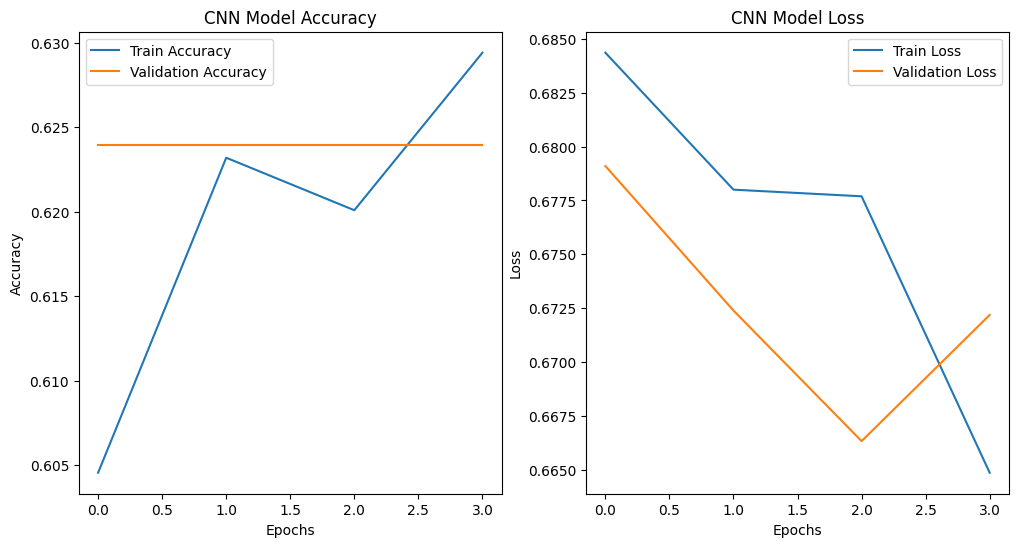

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Classification Report:

              precision    recall  f1-score   support

       Fresh       1.00      0.65      0.79        91
    Infected       0.83      1.00      0.90       151

    accuracy                           0.87       242
   macro avg       0.91      0.82      0.85       242
weighted avg       0.89      0.87      0.86       242

Confusion Matrix:

[[ 59  32]
 [  0 151]]


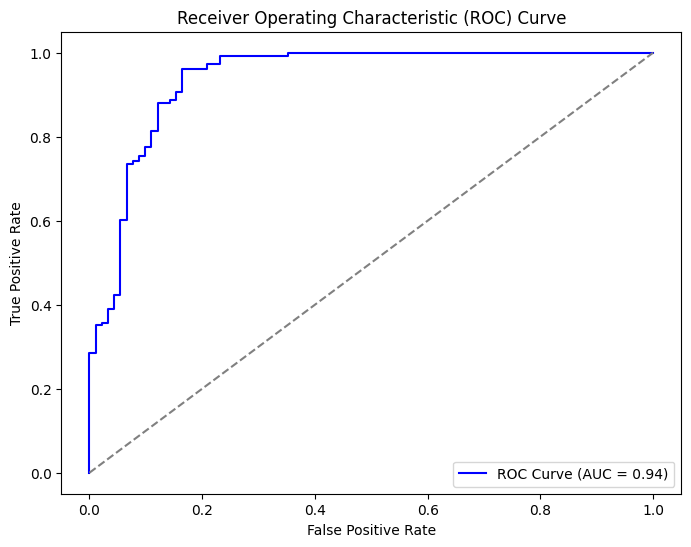

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Function to plot accuracy and loss graphs
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training history for CNN
plot_training_history(history4, "CNN Model")

# Get predictions for evaluation metrics
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = cnn_model3.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions.flatten())  # Ensure predictions are a flat list

# Convert probabilities to binary labels (0 or 1)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_binary, target_names=['Fresh', 'Infected']))

# Confusion Matrix
print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


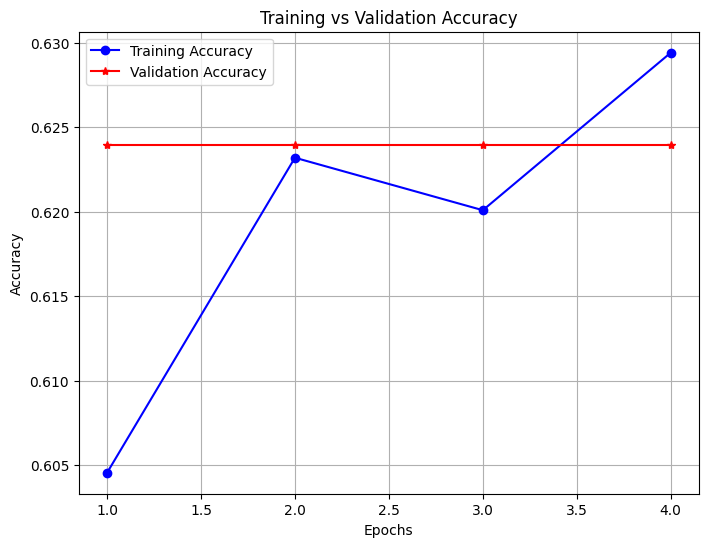

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    epochs = range(1, len(history.history['accuracy']) + 1)  # Get the number of epochs

    plt.figure(figsize=(8, 6))

    # Plot training and validation accuracy
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r*-', label='Validation Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the accuracy graph
plot_accuracy(history4)


In [ ]:
# Initialize the model
cnn_model = build_neural_net()

# Compile with Adam optimizer
cnn_model.compile(optimizer=optimizers.RMSprop(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      27,558,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,692,609 (105.64 MB)

 Trainable params: 27,692,609 (105.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history3 = cnn_model.fit(
    train_dataset,
    epochs=6,
    validation_data=test_dataset
)

Epoch 1/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - accuracy: 0.5496 - loss: 0.8293 - val_accuracy: 0.6240 - val_loss: 0.5416
Epoch 2/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.6733 - loss: 0.5775 - val_accuracy: 0.6322 - val_loss: 0.5213
Epoch 3/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.7593 - loss: 0.4961 - val_accuracy: 0.8017 - val_loss: 0.7230
Epoch 4/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.7881 - loss: 0.6280 - val_accuracy: 0.8760 - val_loss: 0.3808
Epoch 5/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.8448 - loss: 0.3977 - val_accuracy: 0.7893 - val_loss: 0.5473
Epoch 6/6
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.8813 - loss: 0.3123 - val_accuracy: 0.8636 - val_loss: 0.3682


In [ ]:
for images, labels in test_dataset.take(1):
    test_loss, test_acc = cnn_model.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8438 - loss: 0.2720
Test Loss: 0.27195867896080017, Test Accuracy: 0.84375


In [ ]:
# Initialize the model
cnn_model1 = build_neural_net()

# Compile with Adam optimizer
cnn_model1.compile(optimizer=optimizers.SGD(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      27,558,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,692,609 (105.64 MB)

 Trainable params: 27,692,609 (105.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4 = cnn_model1.fit(
    train_dataset,
    epochs=4,
    validation_data=test_dataset
)

Epoch 1/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.5757 - loss: 0.6854 - val_accuracy: 0.6240 - val_loss: 0.6791
Epoch 2/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.6241 - loss: 0.6780 - val_accuracy: 0.6240 - val_loss: 0.6724
Epoch 3/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.6118 - loss: 0.6797 - val_accuracy: 0.6240 - val_loss: 0.6663
Epoch 4/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.6417 - loss: 0.6618 - val_accuracy: 0.6240 - val_loss: 0.6722


In [ ]:
for images, labels in test_dataset.take(1):
    test_loss, test_acc = cnn_model1.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5625 - loss: 0.7077
Test Loss: 0.7077056765556335, Test Accuracy: 0.5625


In [ ]:
from tensorflow.keras import layers, models

mod = models.Sequential([
    layers.InputLayer(input_shape=(250, 250, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # New layer
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),  # More neurons
    layers.Dropout(0.5),  # Prevent overfitting

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import Adam
mod.compile(optimizer=Adam(learning_rate=0.0001),  # Lowered learning rate
            loss='binary_crossentropy',
            metrics=['accuracy'])

mod.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 250, 250, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 31, 31, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │      29,491,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,044,481 (114.61 MB)

 Trainable params: 30,044,481 (114.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history5 = mod.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.6122 - loss: 0.6921 - val_accuracy: 0.6240 - val_loss: 0.6533
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.6351 - loss: 0.6398 - val_accuracy: 0.7934 - val_loss: 0.5245
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.7704 - loss: 0.5140 - val_accuracy: 0.8471 - val_loss: 0.4111
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.8421 - loss: 0.3961 - val_accuracy: 0.9050 - val_loss: 0.3623
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.8783 - loss: 0.3332 - val_accuracy: 0.8926 - val_loss: 0.3391
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.8808 - loss: 0.3098 - val_accuracy: 0.8926 - val_loss: 0.3149
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9053 - loss: 0.2583 - val_accuracy: 0.9091 - val_loss: 0.3002
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.9068 - loss: 0.2447 - val_accuracy:

In [ ]:
for images, labels in test_dataset.take(1):
    test_loss, test_acc = mod.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8750 - loss: 0.3134
Test Loss: 0.31342580914497375, Test Accuracy: 0.875


In [ ]:
from tensorflow.keras import layers, models, optimizers

mod2 = models.Sequential([
    layers.InputLayer(input_shape=(250, 250, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),  # NEW Layer
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# Import the RMSprop optimizer explicitly
#from tensorflow.keras.optimizers import RMSprop #This was the old line causing the error

mod2.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), #Replaced old line with this
            loss='binary_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
history5 = mod2.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.6046 - loss: 0.6859 - val_accuracy: 0.6240 - val_loss: 0.6850
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.6335 - loss: 0.6802 - val_accuracy: 0.6240 - val_loss: 0.6742
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.6352 - loss: 0.6669 - val_accuracy: 0.6240 - val_loss: 0.6424
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.6317 - loss: 0.6392 - val_accuracy: 0.5248 - val_loss: 0.6736
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.7699 - loss: 0.5478 - val_accuracy: 0.6942 - val_loss: 0.5276
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.8304 - loss: 0.4531 - val_accuracy: 0.7479 - val_loss: 0.4796
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.8320 - loss: 0.4384 - val_accuracy: 0.8099 - val_loss: 0.5491
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8371 - loss: 0.4049 - val_accuracy: 0

In [ ]:
for images, labels in test_dataset.take(1):
    test_loss, test_acc = mod2.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9375 - loss: 0.2620
Test Loss: 0.26204758882522583, Test Accuracy: 0.9375
